In [1]:
%load_ext autoreload
%autoreload 2

from utils import extract_best_entries, extract_first_entries, extract_random_entries, render_multiple, render_single, get_dataset_files
from ipyplot import plot_images
from PIL import Image as pilimg

import io, random, os
import pandas as pd
import numpy as np

In [2]:
min_num_entries = 500
root = './analysis/'
if not os.path.exists(root):
    os.makedirs(root)

files = get_dataset_files()
files.sort()

for idx, file in enumerate(files):
    print(f'\n--- Processing {file} ({idx + 1}/{len(files)}) ---')

    slash_idx = file.rindex('/')
    ext_idx = file.rindex('.ndjson')
    dir_name = root + file[slash_idx + 1:ext_idx].replace(' ', '-')
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
        print(f'Created directory "{dir_name}')
    else:
        print(f'Directory "{dir_name}" already exists.')

    df: pd.DataFrame = extract_first_entries(file, recognized=True)
    print(f'Done loading {len(df)} entries')

    counts = df['countrycode'].value_counts()
    counts = counts[(counts > min_num_entries)]
    dfs = []
    for k, v in counts.to_dict().items():
        dfs.append(df[df['countrycode'] == k].sample(min_num_entries))
    print(f'The following {len(counts)} countries have at least {min_num_entries} entries: {list(counts.keys())}')

    drawings = {}
    for d in dfs:
        country = d['countrycode'].iloc[0]
        image = pilimg.open(io.BytesIO(render_multiple(d['drawing'])))
        image.save(f'{dir_name}/{country}.png', format='png')
    print(f'Done saving image files.')


--- Processing ./dataset/The Eiffel Tower.ndjson (1/341) ---
Directory "./analysis/The-Eiffel-Tower" already exists.
Done loading 130433 entries
The following 41 countries have at least 500 entries: ['US', 'GB', 'DE', 'CA', 'RU', 'AU', 'BR', 'FI', 'SE', 'IT', 'CZ', 'FR', 'PL', 'KR', 'SA', 'PH', 'NL', 'TH', 'HU', 'ID', 'IN', 'RO', 'SK', 'VN', 'JP', 'AE', 'UA', 'NO', 'TW', 'HR', 'MY', 'IE', 'RS', 'TR', 'NZ', 'AT', 'BG', 'DK', 'CH', 'PT', 'ES']


KeyboardInterrupt: 

Candidates:
 - ambulance
 - bed
 - bench
 - bread
 - castle
 - cell phone
 - chair
 - church
 - coffee cup
 - crown
 - cruise ship
 - cup
 - diamond
 - dishwasher
 - dresser
 - eye
 - face
 - fan
 - fire hydrant
 - fish
 - hammer
 - hat
 - helicopter
 - ice cream
 - lantern
 - passport
 - pickup truck
 - pillow
 - power outlet
 - sailboat
 - sandwich
 - snowman
 - star
 - strawberry
 - suitcase
 - table
 - telephone
 - traffic light
 - watermelon
 - wine glass
 

[1000, 1000, 1000]


/home/chris/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order)



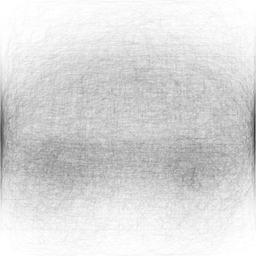
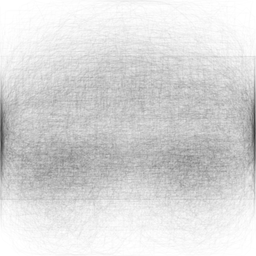
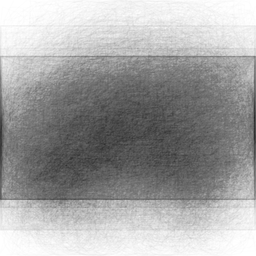


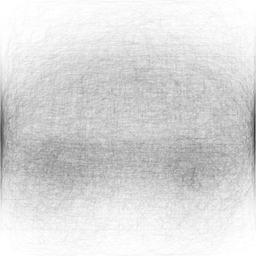
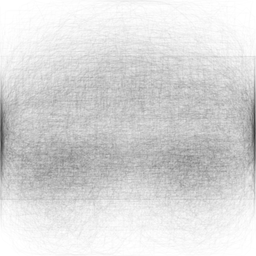
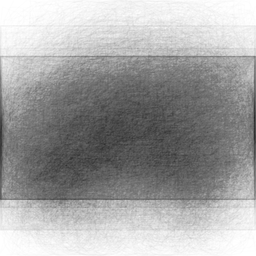

In [3]:
r = False

files = './dataset/car.ndjson'

dfs = [extract_first_entries(files, 1000, recognized=r), extract_random_entries(files, 1000, recognized=r), extract_best_entries(files, 1000, recognized=r)]
print(list(map(lambda d: len(d), dfs)))
dfs = list(map(lambda d: d['drawing'], dfs))
imgbytes = list(map(lambda d: render_multiple(d), dfs))

plot_images(list(map(lambda i: pilimg.open(io.BytesIO(i)), imgbytes)), max_images=6, img_width=256)

In [ ]:
files = './dataset/fish.ndjson'

df = extract_best_entries(files, 1000, recognized=True, skip_first=200)
df = df[df['countrycode'] == 'RU']
imgbytes = list(map(lambda d: render_single(d, resolution=64), df['drawing']))

print(list(map(lambda p: np.array(p), imgbytes)))

plot_images(list(map(lambda i: pilimg.open(io.BytesIO(i)), imgbytes)), max_images=-1, img_width=64)

In [ ]:
img = df['drawing'].sample()
print(img)
png = render_single(img, resolution=64)

197    [[[0, 3, 10, 32, 94, 188, 210, 221, 218], [34,...
Name: drawing, dtype: object


TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [ ]:
# files = get_dataset_files()
# files = random.sample(files, 1)
files = ['./dataset/power outlet.ndjson']
print(files)

df: pd.DataFrame = extract_best_entries(files, recognized=True)


In [ ]:
counts = df['countrycode'].value_counts()
dfs = []
for k, v in counts[(counts > 500)].to_dict().items():
    dfs.append(df[df['countrycode'] == k].sample(500))

drawings = {}
for d in dfs:
    country = d['countrycode'].iloc[0]
    drawings[country] = pilimg.open(io.BytesIO(render_multiple(d['drawing'])))
    
plot_images(list(drawings.values()), list(drawings.keys()))